# ISM Review 

## Decision Tree

# Code

## Header and Dataset

In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [2]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

In [3]:
import pandas as pd
data1=pd.read_csv('C:/Users/cyril/OneDrive/Pictures/SEM 6/assignment/ISM/Project/Dataset/06_13_2017-ad-ewind-koodous-1d.csv')
data2=pd.read_csv('C:/Users/cyril/OneDrive/Pictures/SEM 6/assignment/ISM/Project/Dataset/06_13_2017-ad-feiwo-fortinet-04c12809d3b1809c9980bd1e3e11e0f7.pcap_ISCX.csv')
data3=pd.read_csv('C:/Users/cyril/OneDrive/Pictures/SEM 6/assignment/ISM/Project/Dataset/06_13_2017-ad-kemoge-lookout-0c67d0919e574a6876c73118260368ee.pcap_ISCX.csv')
data4=pd.read_csv('C:/Users/cyril/OneDrive/Pictures/SEM 6/assignment/ISM/Project/Dataset/06_13_2017-ad-mobidash-net32-04e1ddcf21e336694f56c2f819f8f467.pcap_ISCX.csv')
data5=pd.read_csv('C:/Users/cyril/OneDrive/Pictures/SEM 6/assignment/ISM/Project/Dataset/06_14_2017-ad-Chinese-koodous-4dfb36ce42608ba7692540febfc97b48.pcap_ISCX.csv')
data6=pd.read_csv('C:/Users/cyril/OneDrive/Pictures/SEM 6/assignment/ISM/Project/Dataset/06_14_2017-ad-dowgin-gdata-1c.csv')
data7=pd.read_csv('C:/Users/cyril/OneDrive/Pictures/SEM 6/assignment/ISM/Project/Dataset/06_14_2017-ad-selfmite-fortinet-3d4b4968621c5f42d835447643f37105.pcap_ISCX.csv')
data8=pd.read_csv('C:/Users/cyril/OneDrive/Pictures/SEM 6/assignment/ISM/Project/Dataset/06_14_2017-ad-shuanet-lookout-1ef96d3b8e4b5d44eb4932a6da59b6da.pcap_ISCX.csv')
data9=pd.read_csv('C:/Users/cyril/OneDrive/Pictures/SEM 6/assignment/ISM/Project/Dataset/06_15_2017-ad-gooligan-fortinet-1634b1fb3b353019e9d3b7b3d21507ab.pcap_ISCX.csv')
data10=pd.read_csv('C:/Users/cyril/OneDrive/Pictures/SEM 6/assignment/ISM/Project/Dataset/06_15_2017-ad-youmi-gdata-3d2f3690fcb3d3836161f12f6f14c633.pcap_ISCX.csv')

## Cleaning Dataset

In [4]:
print(data1.shape)
print(data2.shape)
print(data3.shape)
print(data4.shape)
print(data5.shape)

(2888, 86)
(3578, 85)
(2367, 85)
(2420, 85)
(3604, 85)


In [5]:
data1 = data1.drop(['Unnamed: 85'],axis=1)

In [6]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2888 entries, 0 to 2887
Data columns (total 85 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Flow ID                      2888 non-null   object 
 1   Source IP                    2888 non-null   object 
 2   Source Port                  2888 non-null   int64  
 3   Destination IP               2888 non-null   object 
 4   Destination Port             2888 non-null   int64  
 5   Protocol                     2888 non-null   int64  
 6   Timestamp                    2888 non-null   object 
 7   Flow Duration                2888 non-null   int64  
 8   Total Fwd Packets            2888 non-null   int64  
 9   Total Backward Packets       2888 non-null   int64  
 10  Total Length of Fwd Packets  2888 non-null   int64  
 11  Total Length of Bwd Packets  2888 non-null   int64  
 12  Fwd Packet Length Max        2888 non-null   int64  
 13  Fwd Packet Length 

In [7]:
df = pd.concat([data1, data2,data3,data4,data5,data6, data7,data8,data9,data10], axis=0)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29032 entries, 0 to 1969
Data columns (total 85 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Flow ID                      29032 non-null  object 
 1   Source IP                    29032 non-null  object 
 2   Source Port                  29032 non-null  int64  
 3   Destination IP               29032 non-null  object 
 4   Destination Port             29032 non-null  int64  
 5   Protocol                     29032 non-null  int64  
 6   Timestamp                    29032 non-null  object 
 7   Flow Duration                29032 non-null  int64  
 8   Total Fwd Packets            29032 non-null  int64  
 9   Total Backward Packets       29032 non-null  int64  
 10  Total Length of Fwd Packets  29032 non-null  int64  
 11  Total Length of Bwd Packets  29032 non-null  float64
 12  Fwd Packet Length Max        29032 non-null  int64  
 13  Fwd Packet Length

In [9]:
y=df['Label']

In [10]:
y

0       ADWARE_EWIND
1       ADWARE_EWIND
2       ADWARE_EWIND
3       ADWARE_EWIND
4       ADWARE_EWIND
            ...     
1965    ADWARE_YOUMI
1966    ADWARE_YOUMI
1967    ADWARE_YOUMI
1968    ADWARE_YOUMI
1969    ADWARE_YOUMI
Name: Label, Length: 29032, dtype: object

In [11]:
print(data1.columns)


Index(['Flow ID', 'Source IP', 'Source Port', 'Destination IP',
       'Destination Port', 'Protocol', 'Timestamp', 'Flow Duration',
       'Total Fwd Packets', 'Total Backward Packets',
       'Total Length of Fwd Packets', 'Total Length of Bwd Packets',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
  

In [12]:
df=df.drop(['Flow ID','Destination IP','Fwd Packet Length Max','Fwd Packet Length Min','Bwd Packet Length Max','Bwd Packet Length Min','Flow IAT Max','Flow IAT Min','Fwd IAT Max','Fwd IAT Min','Bwd IAT Max','Bwd IAT Min','Min Packet Length','Max Packet Length','Packet Length Variance','Fwd Header Length','Fwd Avg Bytes/Bulk','Fwd Avg Packets/Bulk','Fwd Avg Bulk Rate','Bwd Avg Bytes/Bulk','Bwd Avg Packets/Bulk','Active Max','Active Min','Idle Max','Idle Min','Label'],axis=1)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29032 entries, 0 to 1969
Data columns (total 59 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Source IP                    29032 non-null  object 
 1   Source Port                  29032 non-null  int64  
 2   Destination Port             29032 non-null  int64  
 3   Protocol                     29032 non-null  int64  
 4   Timestamp                    29032 non-null  object 
 5   Flow Duration                29032 non-null  int64  
 6   Total Fwd Packets            29032 non-null  int64  
 7   Total Backward Packets       29032 non-null  int64  
 8   Total Length of Fwd Packets  29032 non-null  int64  
 9   Total Length of Bwd Packets  29032 non-null  float64
 10  Fwd Packet Length Mean       29032 non-null  float64
 11  Fwd Packet Length Std        29032 non-null  float64
 12  Bwd Packet Length Mean       29032 non-null  float64
 13  Bwd Packet Length

In [14]:
import pandas as pd
import ipaddress
from sklearn.preprocessing import LabelEncoder

df['Source IP'] = df['Source IP'].apply(lambda x: int(ipaddress.IPv4Address(x)))

# convert the time attribute to a datetime object
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
# encode the time attribute as a numeric feature
df['Timestamp'] = df['Timestamp'].astype('int64') / 10**9



In [15]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
y = label_encoder.fit_transform(y)

In [16]:
df

,Source IP,Source Port,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,...,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Idle Mean,Idle Std
0,170524823,58063,443,6,1.497331e+09,209484,1,2,913,309.0,...,2,309,1505,511,0,32,0.0,0.0,0.0,0.0
1,170524823,58063,443,6,1.497331e+09,31308,2,0,85,0.0,...,0,0,1550,-1,0,32,0.0,0.0,0.0,0.0
2,170524823,36864,443,6,1.497331e+09,13333,2,0,85,0.0,...,0,0,1550,-1,0,32,0.0,0.0,0.0,0.0
3,2306130725,443,36864,6,1.497331e+09,45,2,0,0,0.0,...,0,0,510,-1,0,32,0.0,0.0,0.0,0.0
4,170524823,34482,443,6,1.497331e+09,22164,1,1,0,0.0,...,1,0,8170,1622,0,32,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1965,170524883,23816,53,17,1.497523e+09,30892,1,1,31,92.0,...,1,92,-1,-1,0,32,0.0,0.0,0.0,0.0
1966,170524883,13975,53,17,1.497525e+09,566574,1,1,29,84.0,...,1,84,-1,-1,0,20,0.0,0.0,0.0,0.0
1967,170524883,43678,443,6,1.497523e+09,14174876,9,7,332,3810.0,...,7,3810,65535,114,2,32,219369.0,0.0,14000000.0,0.0
1968,170524883,5353,5353,17,1.497525e+09,2090904,8,0,488,0.0,...,0,0,-1,-1,7,32,0.0,0.0,0.0,0.0


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=1, stratify=y)

## Score

In [18]:
from IPython.core.pylabtools import figsize
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, log_loss, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.metrics import classification_report

def matrix(mod,y_pred):
    # Compute classification metrics
    print("Accuracy :",accuracy_score(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    # Plot the confusion matrix using seaborn
    plt.figure(figsize(10,10))
    sns.heatmap(cm, annot=True, fmt='d')

    print ('Classification Report \n: ',classification_report(y_test, y_pred))

## Decision Tree

In [19]:
from sklearn.tree import DecisionTreeClassifier


DT_entropy = DecisionTreeClassifier(random_state=50)
DT_entropy.fit(X_train,y_train)

DecisionTreeClassifier(random_state=50)

In [20]:
print("Train R^2 score 1:", DT_entropy.score(X_train, y_train))
print("Test R^2 score1:", DT_entropy.score(X_test, y_test))

Train R^2 score 1: 1.0
Test R^2 score1: 0.9881177888754951


### Score

Accuracy : 0.9881177888754951
Classification Report 
:                precision    recall  f1-score   support

           0       1.00      1.00      1.00       583
           1       1.00      1.00      1.00       578
           2       0.98      0.98      0.98       716
           3       1.00      1.00      1.00       695
           4       0.93      0.93      0.93       473
           5       1.00      1.00      1.00       721
           6       0.96      0.95      0.95       484
           7       1.00      1.00      1.00       553
           8       1.00      1.00      1.00       610
           9       1.00      1.00      1.00       394

    accuracy                           0.99      5807
   macro avg       0.99      0.99      0.99      5807
weighted avg       0.99      0.99      0.99      5807



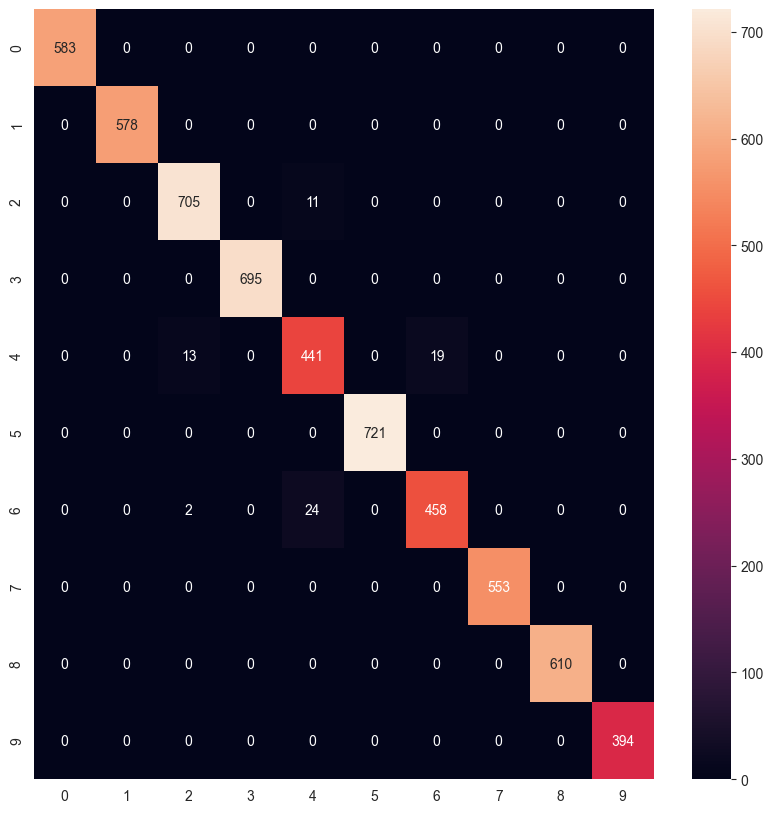

In [21]:
from sklearn.metrics import accuracy_score, log_loss, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.metrics import classification_report
y_pred = DT_entropy.predict(X_test)


# Compute classification metrics
matrix(DT_entropy,y_pred)

## Multinomial Logestic Regression

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
# train the multinomial logistic regression model
mlr = LogisticRegression(multi_class='multinomial', solver='lbfgs')
mlr.fit(X_train, y_train)

C:\Users\cyril\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial')

### Score

Accuracy : 0.15722403995178233


C:\Users\cyril\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\cyril\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\cyril\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

Classification Report 
:                precision    recall  f1-score   support

           0       0.25      0.00      0.00       583
           1       0.27      0.03      0.06       578
           2       0.16      0.23      0.19       716
           3       0.16      0.78      0.26       695
           4       0.25      0.01      0.02       473
           5       0.14      0.21      0.17       721
           6       0.00      0.00      0.00       484
           7       0.00      0.00      0.00       553
           8       0.18      0.05      0.08       610
           9       0.00      0.00      0.00       394

    accuracy                           0.16      5807
   macro avg       0.14      0.13      0.08      5807
weighted avg       0.15      0.16      0.09      5807



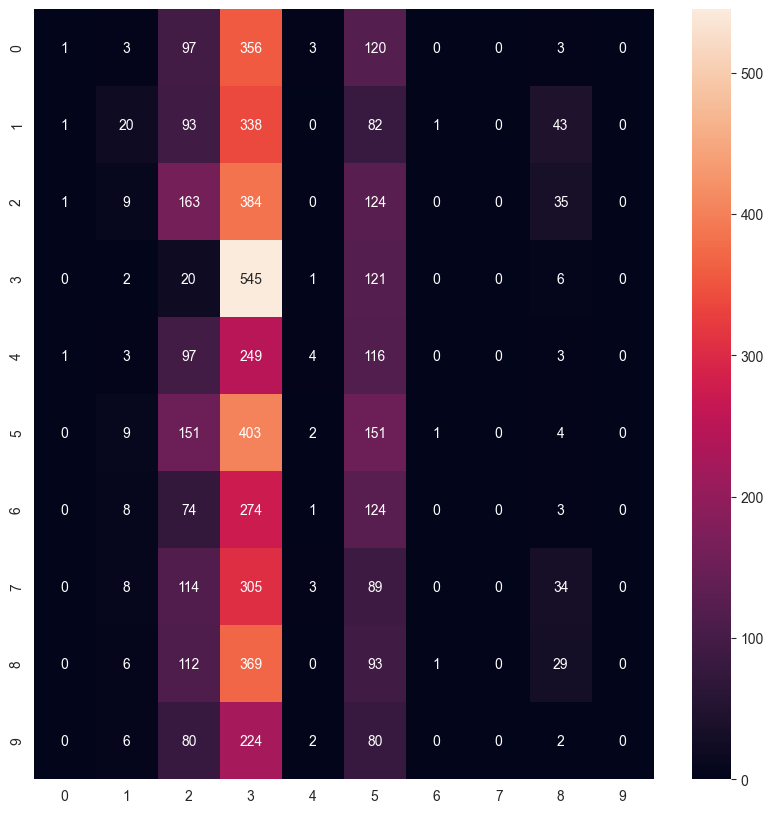

In [24]:
from sklearn.metrics import accuracy_score, log_loss, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.metrics import classification_report
y_pred = mlr.predict(X_test)


# Compute classification metrics
matrix(mlr,y_pred)

## SVM

In [25]:
from sklearn import svm

sv = svm.SVC(kernel='rbf', C=100,probability=True)

In [26]:
sv.fit(X_train, y_train)

SVC(C=100, probability=True)

### Score

Accuracy : 0.17100051661787496
Classification Report 
:                precision    recall  f1-score   support

           0       0.00      0.00      0.00       583
           1       0.40      0.01      0.01       578
           2       0.19      0.24      0.21       716
           3       0.16      0.91      0.27       695
           4       0.00      0.00      0.00       473
           5       0.20      0.23      0.22       721
           6       0.00      0.00      0.00       484
           7       0.00      0.00      0.00       553
           8       0.37      0.02      0.04       610
           9       1.00      0.00      0.01       394

    accuracy                           0.17      5807
   macro avg       0.23      0.14      0.08      5807
weighted avg       0.21      0.17      0.09      5807



C:\Users\cyril\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\cyril\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\cyril\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

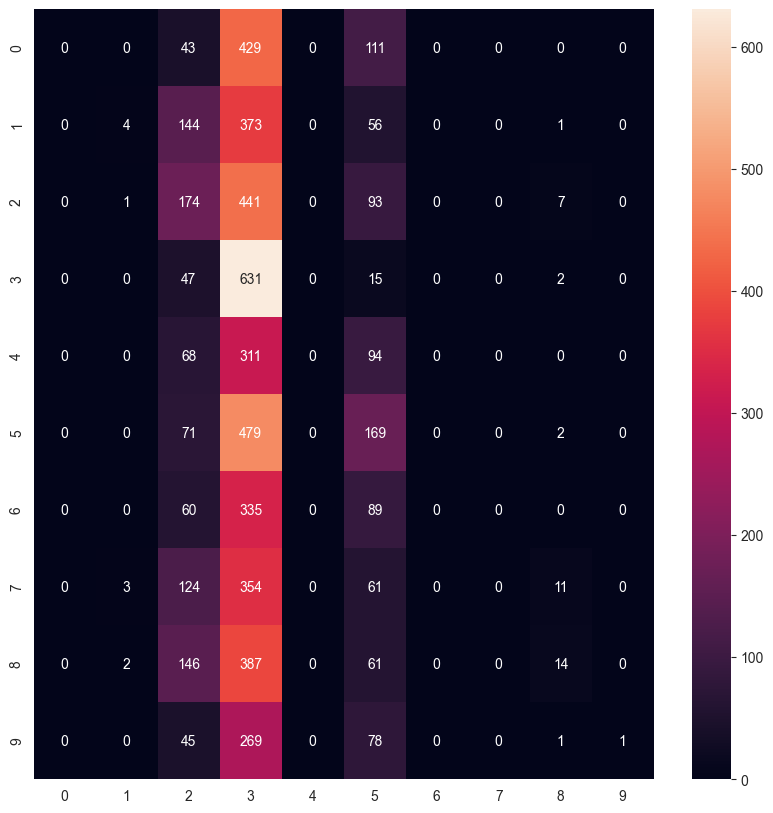

In [27]:
from sklearn.metrics import accuracy_score, log_loss, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.metrics import classification_report
y_pred = sv.predict(X_test)


# Compute classification metrics
matrix(sv,y_pred)

## Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier
# Train a random forest regressor model
rf = RandomForestClassifier(n_estimators=300,criterion='entropy', random_state=50)

In [29]:

rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=300, random_state=50)

### Score

Accuracy : 0.9500602720854141
Classification Report 
:                precision    recall  f1-score   support

           0       0.93      0.96      0.94       583
           1       0.99      0.99      0.99       578
           2       0.96      0.97      0.97       716
           3       1.00      0.98      0.99       695
           4       0.86      0.92      0.89       473
           5       0.92      0.93      0.92       721
           6       0.91      0.77      0.84       484
           7       0.97      0.99      0.98       553
           8       0.97      0.98      0.98       610
           9       0.97      0.97      0.97       394

    accuracy                           0.95      5807
   macro avg       0.95      0.95      0.95      5807
weighted avg       0.95      0.95      0.95      5807



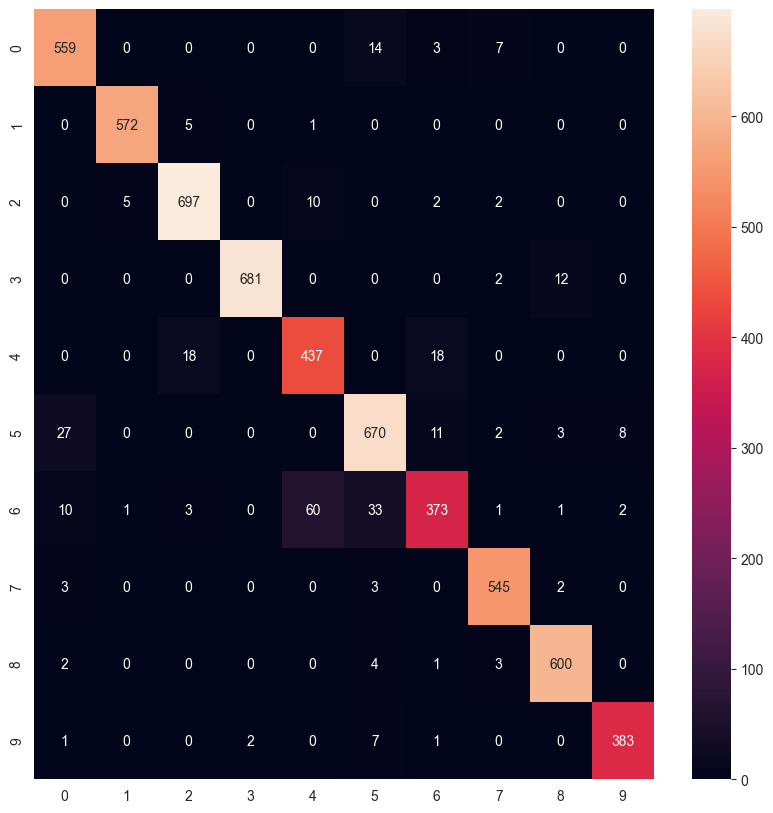

In [30]:
from sklearn.metrics import accuracy_score, log_loss, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.metrics import classification_report
y_pred = rf.predict(X_test)


# Compute classification metrics
matrix(rf,y_pred)

In [31]:
from sklearn.ensemble import BaggingClassifier

### BaggingClassifier

In [32]:
boostingrf = BaggingClassifier(estimator=rf, n_estimators=40)

boostingrf.fit(X_train, y_train)


BaggingClassifier(estimator=RandomForestClassifier(criterion='entropy',
                                                   n_estimators=300,
                                                   random_state=50),
                  n_estimators=40)

### Score

Accuracy : 0.9509213018770449
Classification Report 
:                precision    recall  f1-score   support

           0       0.93      0.96      0.94       583
           1       0.99      0.99      0.99       578
           2       0.97      0.97      0.97       716
           3       1.00      0.98      0.99       695
           4       0.86      0.94      0.89       473
           5       0.92      0.93      0.92       721
           6       0.92      0.78      0.84       484
           7       0.97      0.98      0.98       553
           8       0.97      0.99      0.98       610
           9       0.98      0.97      0.98       394

    accuracy                           0.95      5807
   macro avg       0.95      0.95      0.95      5807
weighted avg       0.95      0.95      0.95      5807



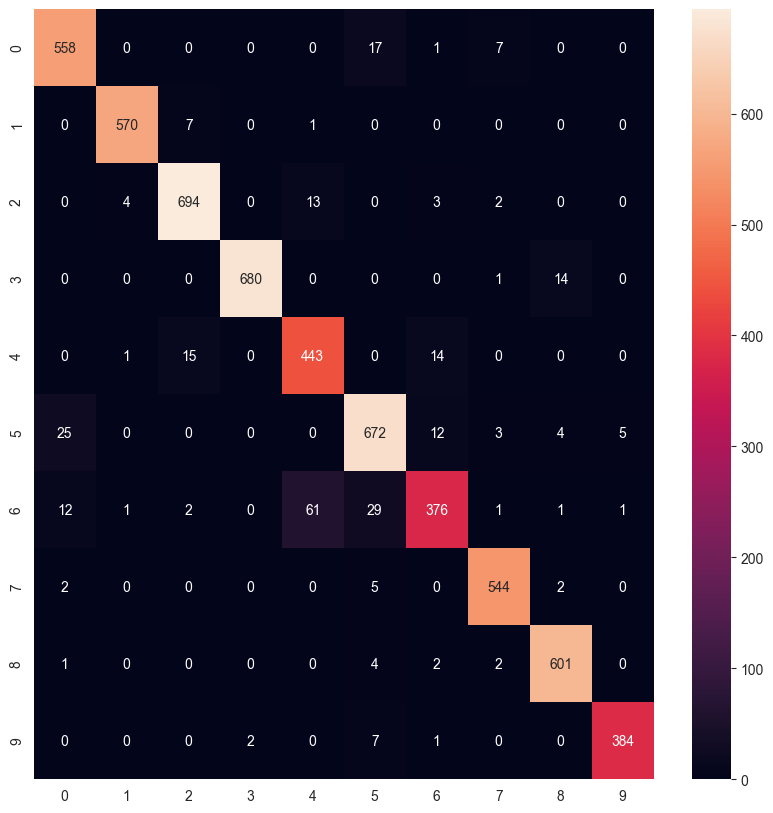

In [33]:
from sklearn.metrics import accuracy_score, log_loss, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.metrics import classification_report
y_pred = boostingrf.predict(X_test)


# Compute classification metrics
matrix(boostingrf, y_pred)

## KNeighborsClassifier

In [34]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

### Score

Accuracy : 0.5159290511451696
Classification Report 
:                precision    recall  f1-score   support

           0       0.40      0.57      0.47       583
           1       0.54      0.62      0.58       578
           2       0.43      0.54      0.48       716
           3       0.86      0.87      0.86       695
           4       0.38      0.27      0.32       473
           5       0.45      0.45      0.45       721
           6       0.39      0.26      0.31       484
           7       0.44      0.40      0.42       553
           8       0.55      0.53      0.54       610
           9       0.80      0.49      0.61       394

    accuracy                           0.52      5807
   macro avg       0.52      0.50      0.50      5807
weighted avg       0.52      0.52      0.51      5807



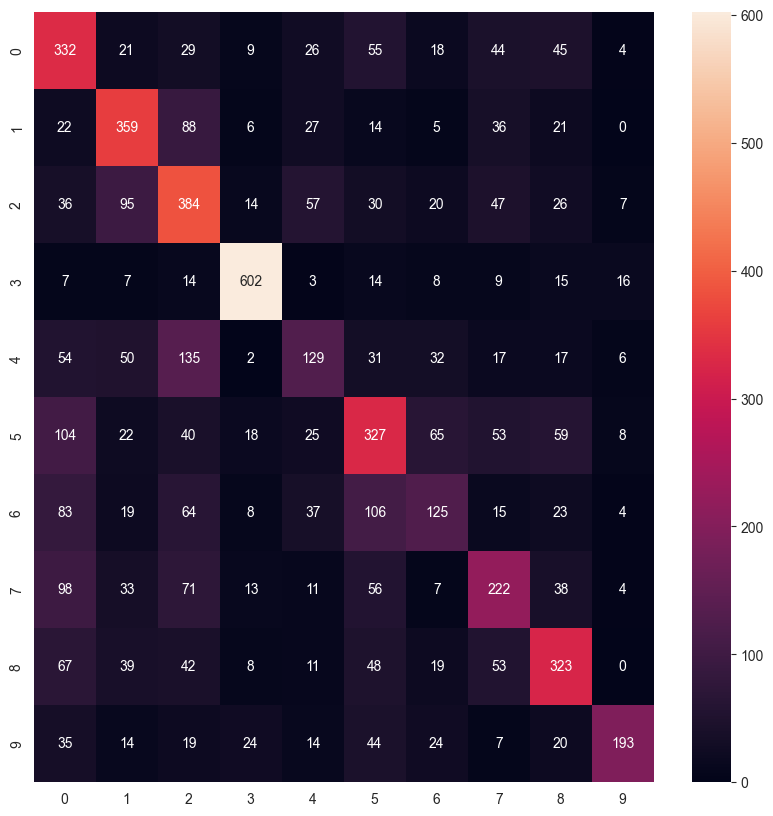

In [35]:
from sklearn.metrics import accuracy_score, log_loss, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.metrics import classification_report
y_pred = knn.predict(X_test)


# Compute classification metrics
matrix(knn, y_pred)

## Voting

In [36]:
from sklearn.ensemble import  VotingClassifier

In [37]:
voting_regressor = VotingClassifier(estimators=[('boostingrf', boostingrf), ('knn', knn), ('DT_entropy', DT_entropy)])
voting_regressor.fit(X_train, y_train)
y_pred = voting_regressor.predict(X_test)

### Score

Accuracy : 0.9579817461684175
Classification Report 
:                precision    recall  f1-score   support

           0       0.92      0.99      0.95       583
           1       0.96      0.99      0.98       578
           2       0.92      0.98      0.95       716
           3       0.99      0.98      0.99       695
           4       0.90      0.91      0.91       473
           5       0.96      0.95      0.95       721
           6       0.97      0.79      0.87       484
           7       0.99      0.99      0.99       553
           8       0.98      0.99      0.99       610
           9       1.00      0.97      0.98       394

    accuracy                           0.96      5807
   macro avg       0.96      0.95      0.96      5807
weighted avg       0.96      0.96      0.96      5807



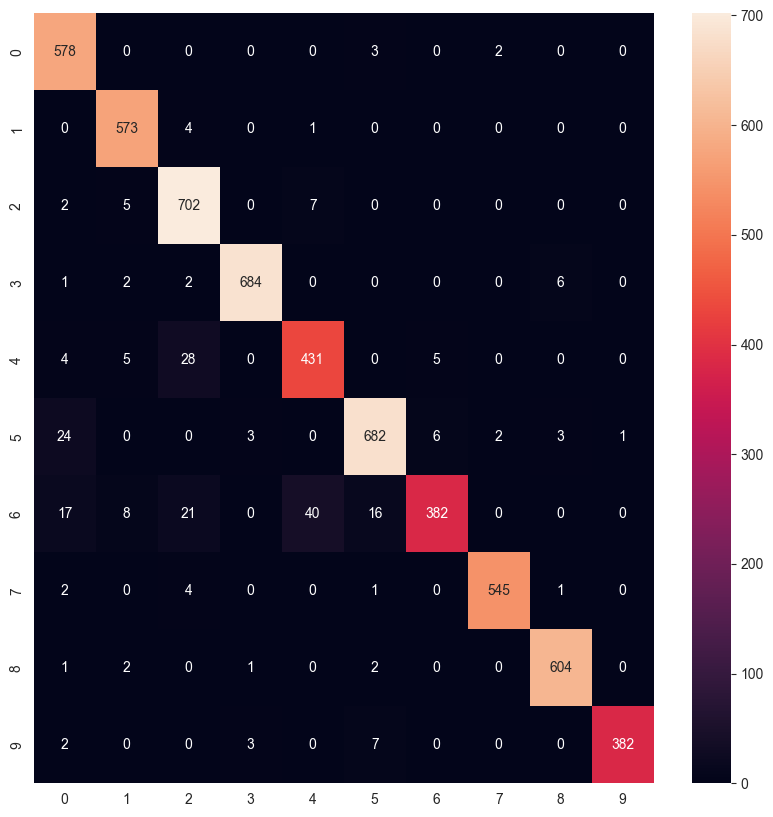

In [38]:
from sklearn.metrics import accuracy_score, log_loss, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.metrics import classification_report
#y_pred = voting_regressor.predict(X_test)


# Compute classification metrics
matrix(voting_regressor, y_pred)

## Save The Model

In [39]:

import pickle

In [40]:

# save the model as a file
with open('model.pkl', 'wb') as file:
    pickle.dump(voting_regressor, file)
    


In [41]:
model = pickle.load(open('C:/Users/cyril/OneDrive/Pictures/SEM 6/assignment/ISM/Project/model.pkl', 'rb'))

## Getting User Inputs

In [42]:
import numpy as np
import pandas as pd

In [43]:
import pandas as pd
data1=pd.read_csv('C:/Users/cyril/OneDrive/Pictures/SEM 6/assignment/ISM/Project/Dataset/06_13_2017-ad-ewind-koodous-1d.csv')
data2=pd.read_csv('C:/Users/cyril/OneDrive/Pictures/SEM 6/assignment/ISM/Project/Dataset/06_13_2017-ad-feiwo-fortinet-04c12809d3b1809c9980bd1e3e11e0f7.pcap_ISCX.csv')
data3=pd.read_csv('C:/Users/cyril/OneDrive/Pictures/SEM 6/assignment/ISM/Project/Dataset/06_13_2017-ad-kemoge-lookout-0c67d0919e574a6876c73118260368ee.pcap_ISCX.csv')
data4=pd.read_csv('C:/Users/cyril/OneDrive/Pictures/SEM 6/assignment/ISM/Project/Dataset/06_13_2017-ad-mobidash-net32-04e1ddcf21e336694f56c2f819f8f467.pcap_ISCX.csv')
data5=pd.read_csv('C:/Users/cyril/OneDrive/Pictures/SEM 6/assignment/ISM/Project/Dataset/06_14_2017-ad-Chinese-koodous-4dfb36ce42608ba7692540febfc97b48.pcap_ISCX.csv')
data6=pd.read_csv('C:/Users/cyril/OneDrive/Pictures/SEM 6/assignment/ISM/Project/Dataset/06_14_2017-ad-dowgin-gdata-1c.csv')
data7=pd.read_csv('C:/Users/cyril/OneDrive/Pictures/SEM 6/assignment/ISM/Project/Dataset/06_14_2017-ad-selfmite-fortinet-3d4b4968621c5f42d835447643f37105.pcap_ISCX.csv')
data8=pd.read_csv('C:/Users/cyril/OneDrive/Pictures/SEM 6/assignment/ISM/Project/Dataset/06_14_2017-ad-shuanet-lookout-1ef96d3b8e4b5d44eb4932a6da59b6da.pcap_ISCX.csv')
data9=pd.read_csv('C:/Users/cyril/OneDrive/Pictures/SEM 6/assignment/ISM/Project/Dataset/06_15_2017-ad-gooligan-fortinet-1634b1fb3b353019e9d3b7b3d21507ab.pcap_ISCX.csv')
data10=pd.read_csv('C:/Users/cyril/OneDrive/Pictures/SEM 6/assignment/ISM/Project/Dataset/06_15_2017-ad-youmi-gdata-3d2f3690fcb3d3836161f12f6f14c633.pcap_ISCX.csv')

In [44]:
data1 = data1.drop(['Unnamed: 85'],axis=1)

In [45]:
df = pd.concat([data1, data2,data3,data4,data5,data6, data7,data8,data9,data10], axis=0)

In [46]:
y=df['Label']

In [47]:
df=df.drop(['Flow ID','Destination IP','Fwd Packet Length Max','Fwd Packet Length Min','Bwd Packet Length Max','Bwd Packet Length Min','Flow IAT Max','Flow IAT Min','Fwd IAT Max','Fwd IAT Min','Bwd IAT Max','Bwd IAT Min','Min Packet Length','Max Packet Length','Packet Length Variance','Fwd Header Length','Fwd Avg Bytes/Bulk','Fwd Avg Packets/Bulk','Fwd Avg Bulk Rate','Bwd Avg Bytes/Bulk','Bwd Avg Packets/Bulk','Active Max','Active Min','Idle Max','Idle Min','Label'],axis=1)

In [48]:
import ipaddress
from sklearn.preprocessing import LabelEncoder

df['Source IP'] = df['Source IP'].apply(lambda x: int(ipaddress.IPv4Address(x)))

# convert the time attribute to a datetime object
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
# encode the time attribute as a numeric feature
df['Timestamp'] = df['Timestamp'].astype('int64') / 10**9

In [49]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
y = label_encoder.fit_transform(y)

In [50]:
import random

In [51]:
Source_IP = random.uniform(np.min(df['Source IP']),np.max(df['Source IP']))
Source_Port = random.uniform(np.min(df['Source Port']),np.max(df['Source Port']))
Destination_Port = random.uniform(np.min(df['Destination Port']),np.max(df['Destination Port']))
Protocol = random.uniform(np.min(df['Protocol']),np.max(df['Protocol']))
Timestamp = random.uniform(np.min(df['Timestamp']),np.max(df['Timestamp']))
FlowDuration = random.uniform(np.min(df['Flow Duration']),np.max(df['Flow Duration']))
TotalFwdPackets = random.uniform(np.min(df['Total Fwd Packets']),np.max(df['Total Fwd Packets']))
TotalBackwardPackets = random.uniform(np.min(df['Total Backward Packets']),np.max(df['Total Backward Packets']))
TotalLengthofFwdPackets = random.uniform(np.min(df['Total Length of Fwd Packets']),np.max(df['Total Length of Fwd Packets']))
TotalLengthofBwdPackets =random.uniform(np.min(df['Total Length of Bwd Packets']),np.max(df['Total Length of Bwd Packets']))
FwdPacketLengthMean = random.uniform(np.min(df['Fwd Packet Length Mean']),np.max(df['Fwd Packet Length Mean']))
FwdPacketLengthStd = random.uniform(np.min(df['Fwd Packet Length Std']),np.max(df['Fwd Packet Length Std']))
BwdPacketLengthMean = random.uniform(np.min(df['Bwd Packet Length Mean']),np.max(df['Bwd Packet Length Mean']))
BwdPacketLengthStd = random.uniform(np.min(df['Bwd Packet Length Std']),np.max(df['Bwd Packet Length Std']))
FlowBytes = random.uniform(np.min(df['Flow Bytes/s']),np.max(df['Flow Bytes/s']))
FlowPackets = random.uniform(np.min(df['Flow Packets/s']),np.max(df['Flow Packets/s']))
FlowIATMean = random.uniform(np.min(df['Flow IAT Mean']),np.max(df['Flow IAT Mean']))
FlowIATStd = random.uniform(np.min(df['Flow IAT Std']),np.max(df['Flow IAT Std']))
FwdIATTotal = random.uniform(np.min(df['Fwd IAT Total']),np.max(df['Fwd IAT Total']))
FwdIATMean = random.uniform(np.min(df['Fwd IAT Mean']),np.max(df['Fwd IAT Mean']))
FwdIATStd = random.uniform(np.min(df['Fwd IAT Std']),np.max(df['Fwd IAT Std']))
BwdIATTotal = random.uniform(np.min(df['Bwd IAT Total']),np.max(df['Bwd IAT Total']))
BwdIATMean = random.uniform(np.min(df['Bwd IAT Mean']),np.max(df['Bwd IAT Mean']))
BwdIATStd = random.uniform(np.min(df['Bwd IAT Std']),np.max(df['Bwd IAT Std']))
FwdPSHFlags = random.uniform(np.min(df['Fwd PSH Flags']),np.max(df['Fwd PSH Flags']))
BwdPSHFlags = random.uniform(np.min(df['Bwd PSH Flags']),np.max(df['Bwd PSH Flags']))
FwdURGFlags = random.uniform(np.min(df['Fwd URG Flags']),np.max(df['Fwd URG Flags']))
BwdURGFlags = random.uniform(np.min(df['Bwd URG Flags']),np.max(df['Bwd URG Flags']))
BwdHeaderLength = random.uniform(np.min(df['Bwd Header Length']),np.max(df['Bwd Header Length']))
FwdPackets = random.uniform(np.min(df['Fwd Packets/s']),np.max(df['Fwd Packets/s']))
BwdPackets =random.uniform(np.min(df['Bwd Packets/s']),np.max(df['Bwd Packets/s']))
PacketLengthMean=random.uniform(np.min(df['Packet Length Mean']),np.max(df['Packet Length Mean']))
PacketLengthStd=random.uniform(np.min(df['Packet Length Std']),np.max(df['Packet Length Std']))
FINFlagCount=random.uniform(np.min(df['FIN Flag Count']),np.max(df['FIN Flag Count']))
SYNFlagCount=random.uniform(np.min(df['SYN Flag Count']),np.max(df['SYN Flag Count']))
RSTFlagCount=random.uniform(np.min(df['RST Flag Count']),np.max(df['RST Flag Count']))
PSHFlagCount=random.uniform(np.min(df['PSH Flag Count']),np.max(df['PSH Flag Count']))
ACKFlagCount=random.uniform(np.min(df['ACK Flag Count']),np.max(df['ACK Flag Count']))
URGFlagCount=random.uniform(np.min(df['URG Flag Count']),np.max(df['URG Flag Count']))
CWEFlagCount=random.uniform(np.min(df['CWE Flag Count']),np.max(df['CWE Flag Count']))
ECEFlagCount=random.uniform(np.min(df['ECE Flag Count']),np.max(df['ECE Flag Count']))
DownUpRatio=random.uniform(np.min(df['Down/Up Ratio']),np.max(df['Down/Up Ratio']))
AveragePacketSize=random.uniform(np.min(df['Average Packet Size']),np.max(df['Average Packet Size']))
AvgFwdSegmentSize=random.uniform(np.min(df['Avg Fwd Segment Size']),np.max(df['Avg Fwd Segment Size']))
AvgBwdSegmentSize=random.uniform(np.min(df['Avg Bwd Segment Size']),np.max(df['Avg Bwd Segment Size']))
FwdHeaderLength=32
BwdAvgBulkRate=random.uniform(np.min(df['Bwd Avg Bulk Rate']),np.max(df['Bwd Avg Bulk Rate']))
SubflowFwdPackets=random.uniform(np.min(df['Subflow Fwd Packets']),np.max(df['Subflow Fwd Packets']))
SubflowFwdBytes=random.uniform(np.min(df['Subflow Fwd Bytes']),np.max(df['Subflow Fwd Bytes']))
SubflowBwdPackets=random.uniform(np.min(df['Subflow Bwd Packets']),np.max(df['Subflow Bwd Packets']))
SubflowBwdBytes=random.uniform(np.min(df['Subflow Bwd Bytes']),np.max(df['Subflow Bwd Bytes']))
Init_Win_bytes_forward=random.uniform(np.min(df['Init_Win_bytes_forward']),np.max(df['Init_Win_bytes_forward']))
Init_Win_bytes_backward=random.uniform(np.min(df['Init_Win_bytes_backward']),np.max(df['Init_Win_bytes_backward']))
act_data_pkt_fwd=random.uniform(np.min(df['act_data_pkt_fwd']),np.max(df['act_data_pkt_fwd']))
min_seg_size_forward=random.uniform(np.min(df['min_seg_size_forward']),np.max(df['min_seg_size_forward']))
ActiveMean=random.uniform(np.min(df['Active Mean']),np.max(df['Active Mean']))
ActiveStd=random.uniform(np.min(df['Active Std']),np.max(df['Active Std']))
IdleMean=random.uniform(np.min(df['Idle Mean']),np.max(df['Idle Mean']))
IdleStd=random.uniform(np.min(df['Idle Std']),np.max(df['Idle Std']))

In [52]:
sample = np.array([Source_IP,
Source_Port,
Destination_Port,
Protocol,
Timestamp,
FlowDuration,
TotalFwdPackets,
TotalBackwardPackets,
TotalLengthofFwdPackets,
TotalLengthofBwdPackets,
FwdPacketLengthMean,
FwdPacketLengthStd,
BwdPacketLengthMean,
BwdPacketLengthStd,
FlowBytes,
FlowPackets,
FlowIATMean,
FlowIATStd,
FwdIATTotal,
FwdIATMean,
FwdIATStd,
BwdIATTotal,
BwdIATMean,
BwdIATStd,
FwdPSHFlags,
BwdPSHFlags,
FwdURGFlags,
BwdURGFlags,
BwdHeaderLength,
FwdPackets,
BwdPackets,
PacketLengthMean,
PacketLengthStd,
FINFlagCount,
SYNFlagCount,
RSTFlagCount,
PSHFlagCount,
ACKFlagCount,
URGFlagCount,
CWEFlagCount,
ECEFlagCount,
DownUpRatio,
AveragePacketSize,
AvgFwdSegmentSize,
AvgBwdSegmentSize,
FwdHeaderLength,
BwdAvgBulkRate,
SubflowFwdPackets,
SubflowFwdBytes,
SubflowBwdPackets,
SubflowBwdBytes,
Init_Win_bytes_forward,
Init_Win_bytes_backward,
act_data_pkt_fwd,
min_seg_size_forward,
ActiveMean,
ActiveStd,
IdleMean,
IdleStd]).reshape(1,-1)

In [53]:
len(sample)

1

## Inverse Prediction

In [54]:
y_pred = model.predict(sample)


C:\Users\cyril\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(
C:\Users\cyril\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\cyril\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [55]:
print(label_encoder.inverse_transform(y_pred))

['ADWARE_KOODOUS']
